<a href="https://colab.research.google.com/github/COLOSOUS/Proyecto-acc-time-size-/blob/master/POSTULACION_JackSol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guía de Uso

# Tabla de contenidos

1. [Objetivo](#in1)
2. [Extracción de datos](#ind2)
3. [Analisis exploratorio de datos](#ind3)
4. [Gráficos](#ind4)

5. [Media móvil](#ind5)

6. [Hiperparametros](#ind6)
7. [Resultados](#ind7)
8. [Media móvil](#ind8)
9. [Metodología](#ind9)
10. [Dataframe final obtenido](#ind10)
11. [Conclusiones](#ind11)


#Librerias 

In [50]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1qzYpzSiqxrROw6-8lqFjL3u681dtFR58' -O functions.py ;
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ttzaWajQY7fczFCi5vzX3HAEzfx2d5cn' -O utils.py ;

from functions import *
from utils import *

--2022-11-14 11:26:50--  https://drive.google.com/uc?export=download&id=1qzYpzSiqxrROw6-8lqFjL3u681dtFR58
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.100, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘functions.py’

functions.py            [ <=>                ]   2.21K  --.-KB/s    in 0s      

2022-11-14 11:26:51 (23.5 MB/s) - ‘functions.py’ saved [2263]

--2022-11-14 11:26:51--  https://drive.google.com/uc?export=download&id=1ttzaWajQY7fczFCi5vzX3HAEzfx2d5cn
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.100, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘utils.py’

utils.py                [ <=>                ]   2.21K  --.-KB/s    in 0s 

#1. Objetivo <a name="ind1"></a>

Desarrollar un prototipo de horómetro que permita estimar los momentos en que una máquina 
estuvo encendida.


# 2. Extracción de datos  <a name="ind2"></a>

In [2]:

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=168uOjW9SqR1bJphACkHUhMg2gCBkRbyc' -O machine_id_1.csv ;
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1FdW1lQxVeKnyqmOHdi685QMH12cQdJIk' -O machine_id_5.csv ;
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1nUqbNQgJMa3vJJFSKc_bR9Rlr9BSJWNB' -O machine_id_7.csv ; 
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1c40ntaEW_wYsRbM_UqrDLlw2JbyMxpeM' -O machine_id_12.csv ;
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=12KBg5HEfgyn3mhlFd0QZWPc-v0JweA0r' -O machine_id_17.csv ;




--2022-11-14 10:38:39--  https://drive.google.com/uc?export=download&id=168uOjW9SqR1bJphACkHUhMg2gCBkRbyc
Resolving drive.google.com (drive.google.com)... 142.250.101.113, 142.250.101.139, 142.250.101.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d72qkpteqnldbf1vvbmhv166lvjtr5ar/1668422250000/00026325023726805676/*/168uOjW9SqR1bJphACkHUhMg2gCBkRbyc?e=download&uuid=636ea88f-7c06-4bb2-9500-21510b40955e [following]
--2022-11-14 10:38:40--  https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d72qkpteqnldbf1vvbmhv166lvjtr5ar/1668422250000/00026325023726805676/*/168uOjW9SqR1bJphACkHUhMg2gCBkRbyc?e=download&uuid=636ea88f-7c06-4bb2-9500-21510b40955e
Resolving doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-docs.googleusercontent.com)... 142.251.2.132, 26

# 3. Analisis exploratorio de datos<a name="ind3"></a>

In [3]:
df1 = pd.read_csv('machine_id_1.csv')#machine_id_1
df2 = pd.read_csv('machine_id_5.csv')#machine_id_5
df3 = pd.read_csv('machine_id_7.csv')#machine_id_7
df4 = pd.read_csv('machine_id_12.csv')#machine_id_12
df5 = pd.read_csv('machine_id_17.csv')#machine_id_17
df1.head(5) #visualizar el tipo de datos

,datetime,machine_id,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,velocity_rms_x,velocity_rms_y,velocity_rms_z
0,2022-10-17 09:51:25,1,2.752096,1.950235,2.208238,7.615591,3.721758,2.342389
1,2022-10-17 10:11:13,1,2.245548,1.819128,1.993956,3.822556,4.431720,1.729908
2,2022-10-17 10:31:04,1,2.172684,1.547112,1.926890,4.029144,4.970888,1.706392
3,2022-10-17 10:51:05,1,2.250748,1.523954,1.908656,4.531632,5.285638,1.696199
4,2022-10-17 11:11:21,1,2.290328,2.050253,2.136820,6.996714,4.016892,1.761505


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            733 non-null    object 
 1   machine_id          733 non-null    int64  
 2   acceleration_rms_x  733 non-null    float64
 3   acceleration_rms_y  733 non-null    float64
 4   acceleration_rms_z  733 non-null    float64
 5   velocity_rms_x      733 non-null    float64
 6   velocity_rms_y      733 non-null    float64
 7   velocity_rms_z      733 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.9+ KB


#4. Gráficos <a name="ind4"></a>

A continuación se grafican todos los elementos para visualizar la información presente.En ella se encuentran 4 tipos de datos, que indican cada medición hecha respecto al eje x,y,z y si velocidad o aceleración.

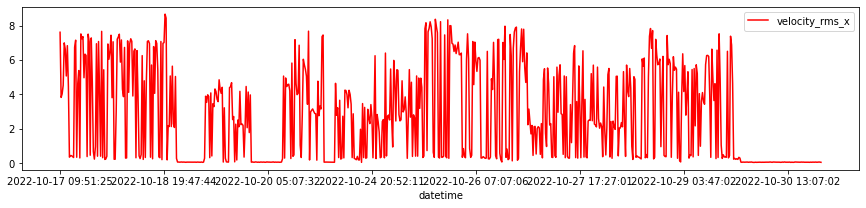

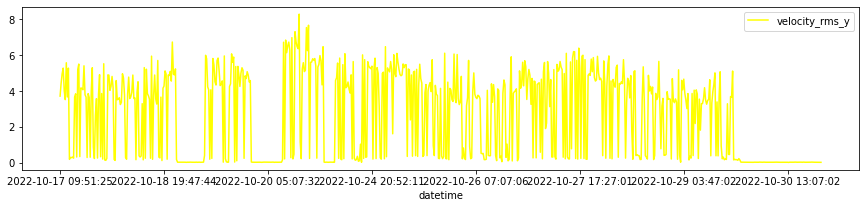

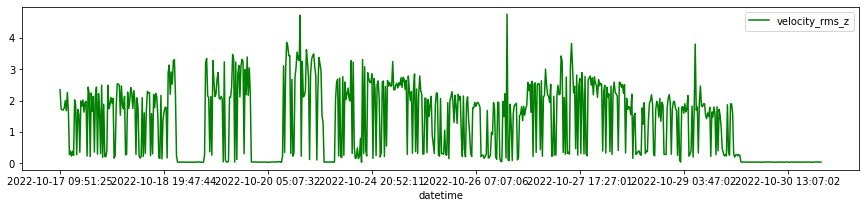

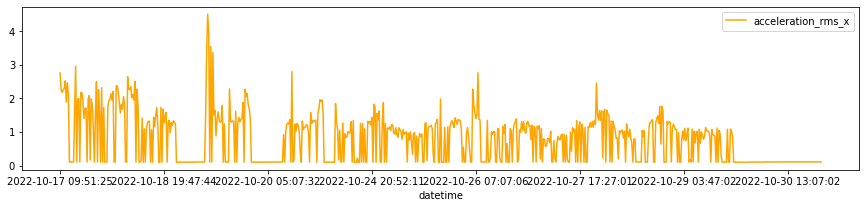

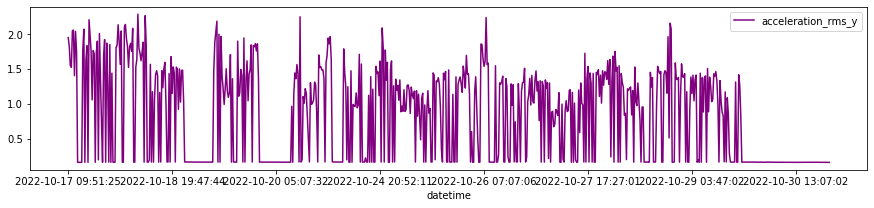

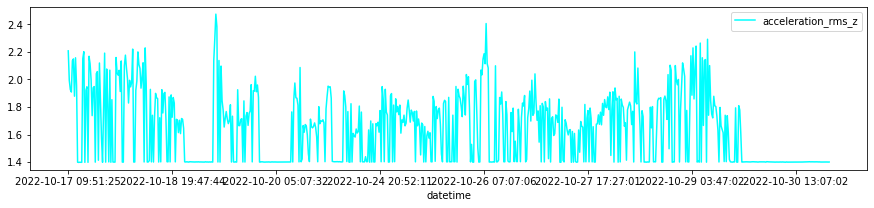

In [5]:
columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z','acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
colors=['red','yellow','green','orange','purple','cyan']
tittles=['velocity_rms_x','velocity_rms_y','velocity_rms_z','acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']

graficos_individuales(df1,'datetime',columns,tittles,colors)

In [6]:
#time corresponde a la fecha/hora en que se realiza cada medición
time=df1['datetime']
time.head(5)

0    2022-10-17 09:51:25
1    2022-10-17 10:11:13
2    2022-10-17 10:31:04
3    2022-10-17 10:51:05
4    2022-10-17 11:11:21
Name: datetime, dtype: object

#5. Media móvil <a name="ind5"></a>
A continuación para poder visualizar y explorar los datos, utilizamos una ventana de datos.Esto se realiza con la suposición de que las máquinas solo se detienen por largos periodos de tiempo dicho de otra manera podemos obtener el promedio del intervalo por cada medición realizada .
Se observa cómo cambia esa medida con una ventana de 3, 6, 12 datos, lo que sería equivalente a obtener intervalos de 1 hora, 2 horas y 4 horas respectivamente.(se tiene en cuenta que la medición se realiza cada 20 min)



Se grafica para 1 hora(la ventana del intevalo por dato, corresponde a 3)

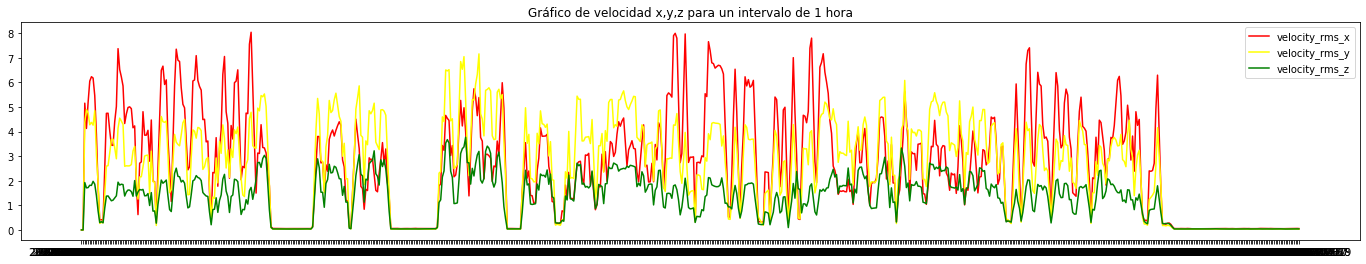

In [7]:
columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z']
subset1,subset2,subset3=mov_avg_function(df1,columns, windows=3)


vectors=[subset1,subset2,subset3]
colors=['red','yellow','green']
tittle='Gráfico de velocidad x,y,z para un intervalo de 1 hora'

grafico_global(time,vectors,tittle,colors,leg=columns)


Se grafica para 2 horas(la ventana del intevalo por dato, corresponde a 6)

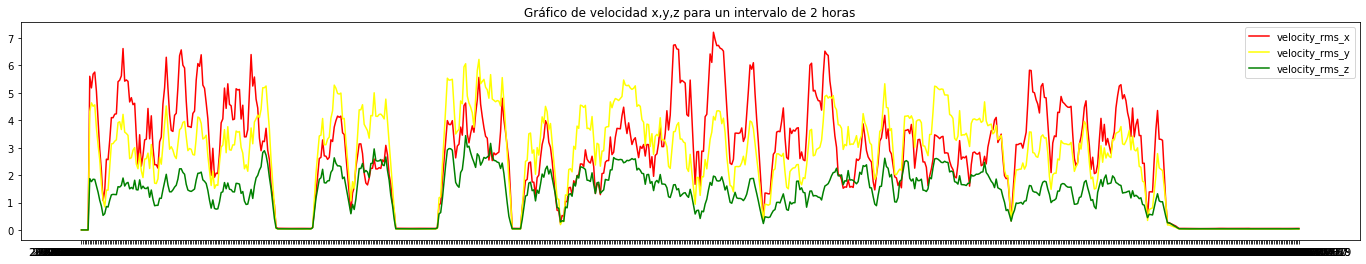

In [8]:

columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z']
subset1,subset2,subset3=mov_avg_function(df1,columns, windows=6)


vectors=[subset1,subset2,subset3]
colors=['red','yellow','green']
tittle='Gráfico de velocidad x,y,z para un intervalo de 2 horas'

grafico_global(time,vectors,tittle,colors,leg=columns)

Se grafica para 3 horas(la ventana del intevalo por dato, corresponde a 12)

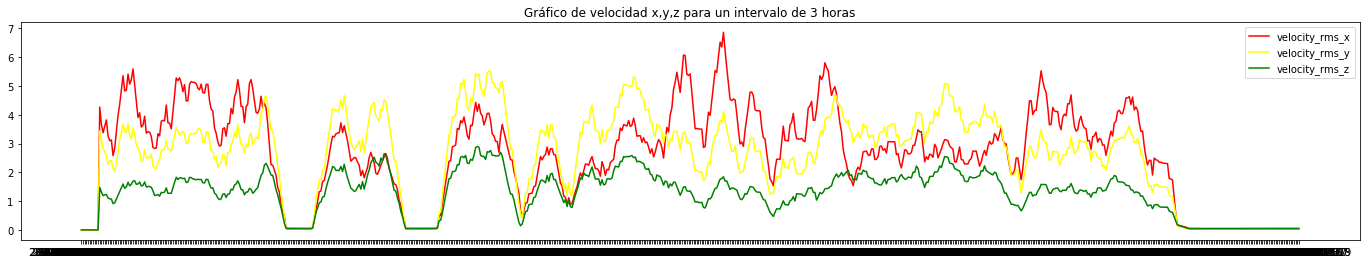

In [9]:

columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z']
subset1,subset2,subset3=mov_avg_function(df1,columns, windows=12)


vectors=[subset1,subset2,subset3]
colors=['red','yellow','green']
tittle="Gráfico de velocidad x,y,z para un intervalo de 3 horas"

grafico_global(time,vectors,tittle,colors,leg=columns)

Como se pudo observar a medida que el tamaño de la ventana crece se atenuan aum mas las zonas locales donde los valores caen y no vuelven a levantar, lo que podemos deducir que son aquellos momentos donde la maquina esta apagada.

# A continuación se muestra un comportamiento similar para el caso de la aceleracion.

Se grafica para 1 hora(la ventana del intevalo por dato, corresponde a 3)

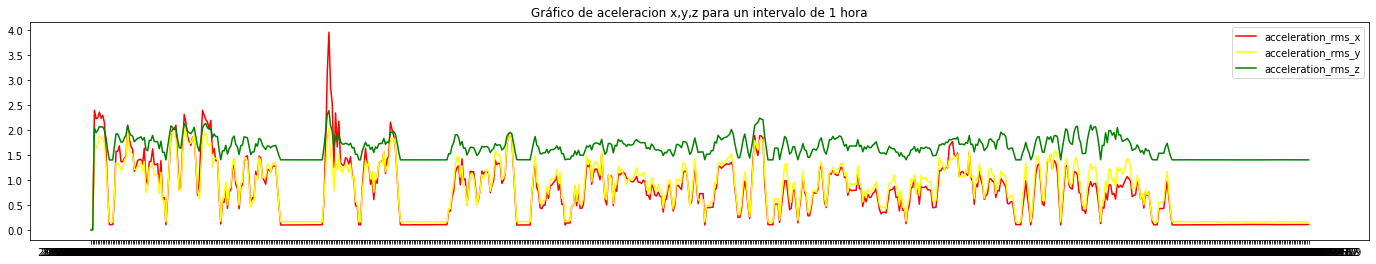

In [10]:
columns=['acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
subset11,subset22,subset33=mov_avg_function(df1,columns, windows=3)


vectors=[subset11,subset22,subset33]
colors=['red','yellow','green']
tittle="Gráfico de aceleracion x,y,z para un intervalo de 1 hora"

grafico_global(time,vectors,tittle,colors,leg=columns)




Se grafica para 2 horas(la ventana del intevalo por dato, corresponde a 6)

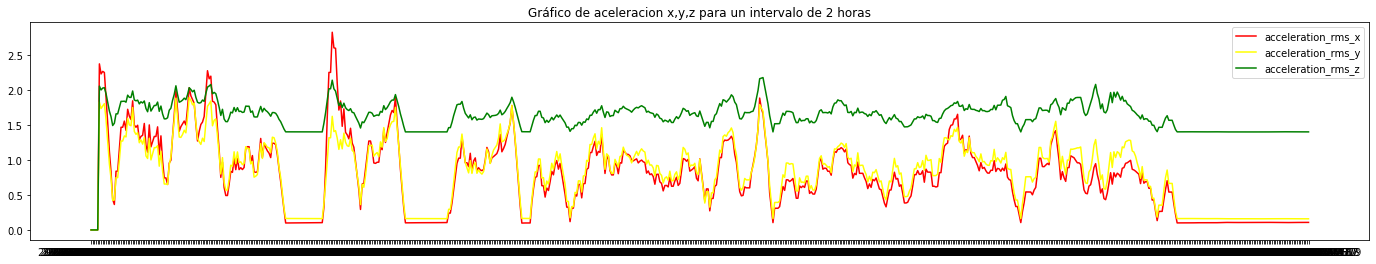

In [11]:

columns=['acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
subset11,subset22,subset33=mov_avg_function(df1,columns, windows=6)


vectors=[subset11,subset22,subset33]
colors=['red','yellow','green']
tittle="Gráfico de aceleracion x,y,z para un intervalo de 2 horas"
grafico_global(time,vectors,tittle,colors,leg=columns)


Se grafica para 3 hora(la ventana del intevalo por dato, corresponde a 12)

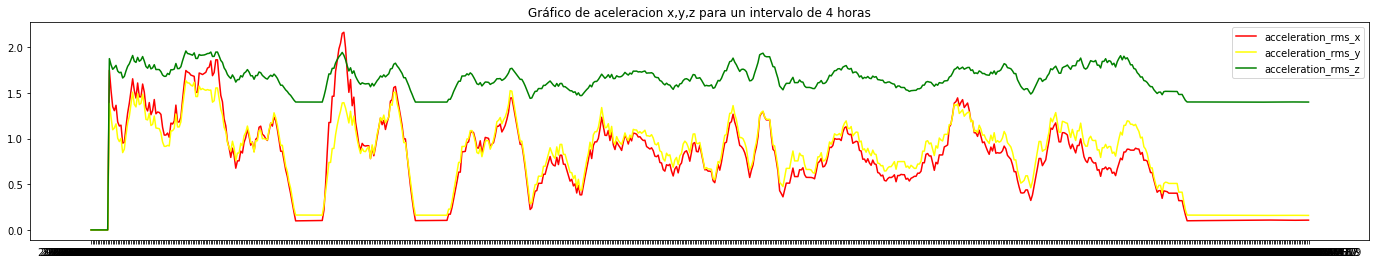

In [12]:
columns=['acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
subset11,subset22,subset33=mov_avg_function(df1,columns, windows=12)


vectors=[subset11,subset22,subset33]
colors=['red','yellow','green']
tittle="Gráfico de aceleracion x,y,z para un intervalo de 4 horas"

grafico_global(time,vectors,tittle,colors,leg=columns)

#6. Hiperparametros<a name="ind6"></a>


Es importante notar que los hiperparametros que maneja la metodología propuesta, es referente al tamaño de la ventana que se considera para calcular media móvil. Esto tambien considera el umbral que es calculado a partir de la media y desviación estándar.


Los 2 valores a continuación se deben ajustar dependiendo de los datos y el resultado que se propone llegar, lo cual nos indica que debemos hacerlo de forma manual.



In [13]:
iterations=10 #veces que calcula la media movil dentro del mismo segmento
windows_size=6 # tamaño de la ventana de la media movil

#7. Resultados<a name="ind6"></a>
##Comportamiento de todas las maquinas
Lo anterior corresponde para la máquina 5, por lo cual se observará el comportamiento para la máquina 7, 12, y 17.

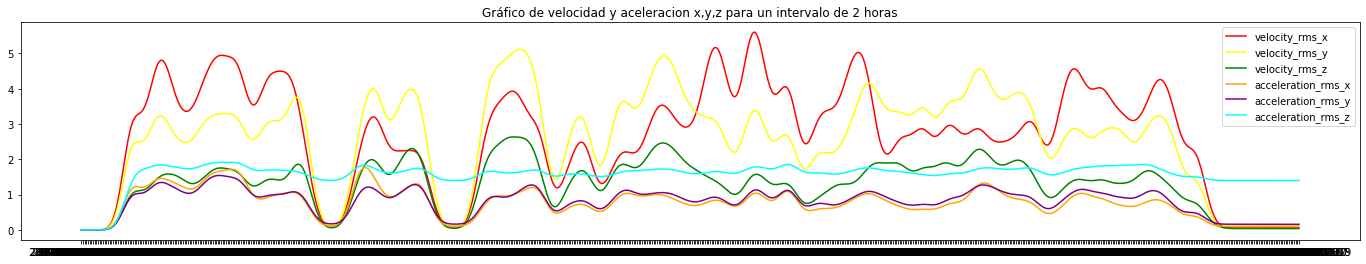

In [15]:
#Maquina 1
time=df1['datetime']
columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z']

subset1_1,subset2_1,subset3_1=mov_avg_function(df1,columns, windows=windows_size)
subset1_1=iterative_mov_avg_function(subset1_1, windows_size,iterations)
subset2_1=iterative_mov_avg_function(subset2_1, windows_size,iterations)
subset3_1=iterative_mov_avg_function(subset3_1, windows_size,iterations)
  
columns=['acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
subset11_1,subset22_1,subset33_1=mov_avg_function(df1,columns, windows=windows_size)
subset11_1=iterative_mov_avg_function(subset11_1, windows_size,iterations)
subset22_1=iterative_mov_avg_function(subset22_1, windows_size,iterations)
subset33_1=iterative_mov_avg_function(subset33_1, windows_size,iterations)

leg=['velocity_rms_x','velocity_rms_y','velocity_rms_z','acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']

vectors=[subset1_1,subset2_1,subset3_1,subset11_1,subset22_1,subset33_1]
colors=['red','yellow','green','orange','purple','cyan']
tittle="Gráfico de velocidad y aceleracion x,y,z para un intervalo de 2 horas"
grafico_global(time,vectors,tittle,colors,leg=leg)

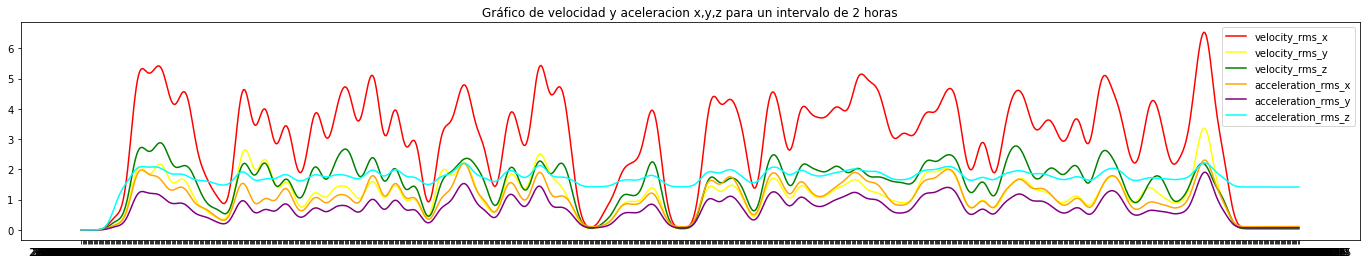

In [16]:
#Maquina 5
time2=df2['datetime']
columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z']

subset1_5,subset2_5,subset3_5=mov_avg_function(df2,columns, windows=windows_size)
subset1_5=iterative_mov_avg_function(subset1_5, windows_size,iterations)
subset2_5=iterative_mov_avg_function(subset2_5, windows_size,iterations)
subset3_5=iterative_mov_avg_function(subset3_5, windows_size,iterations)
  
columns=['acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
subset11_5,subset22_5,subset33_5=mov_avg_function(df2,columns, windows=windows_size)
subset11_5=iterative_mov_avg_function(subset11_5, windows_size,iterations)
subset22_5=iterative_mov_avg_function(subset22_5, windows_size,iterations)
subset33_5=iterative_mov_avg_function(subset33_5, windows_size,iterations)

leg=['velocity_rms_x','velocity_rms_y','velocity_rms_z','acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']

vectors=[subset1_5,subset2_5,subset3_5,subset11_5,subset22_5,subset33_5]
colors=['red','yellow','green','orange','purple','cyan']
tittle="Gráfico de velocidad y aceleracion x,y,z para un intervalo de 2 horas"
grafico_global(time2,vectors,tittle,colors,leg=leg)

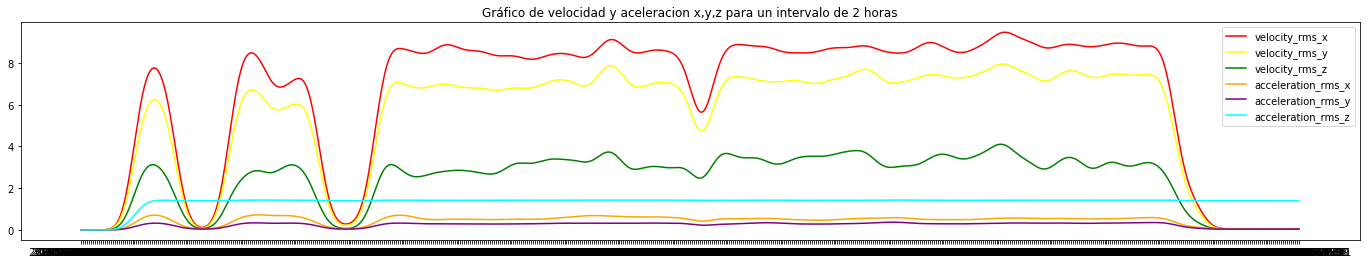

In [17]:
#Maquina 7
time3=df3['datetime']
columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z']
subset1_7,subset2_7,subset3_7=mov_avg_function(df3,columns, windows=windows_size)
subset1_7=iterative_mov_avg_function(subset1_7, windows_size,iterations)
subset2_7=iterative_mov_avg_function(subset2_7, windows_size,iterations)
subset3_7=iterative_mov_avg_function(subset3_7, windows_size,iterations)
  
columns=['acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
subset11_7,subset22_7,subset33_7=mov_avg_function(df3,columns, windows=windows_size)
subset11_7=iterative_mov_avg_function(subset11_7, windows_size,iterations)
subset22_7=iterative_mov_avg_function(subset22_7, windows_size,iterations)
subset33_7=iterative_mov_avg_function(subset33_7, windows_size,iterations)

vectors=[subset1_7,subset2_7,subset3_7,subset11_7,subset22_7,subset33_7]
colors=['red','yellow','green','orange','purple','cyan']
tittle="Gráfico de velocidad y aceleracion x,y,z para un intervalo de 2 horas"
grafico_global(time3,vectors,tittle,colors,leg=leg)

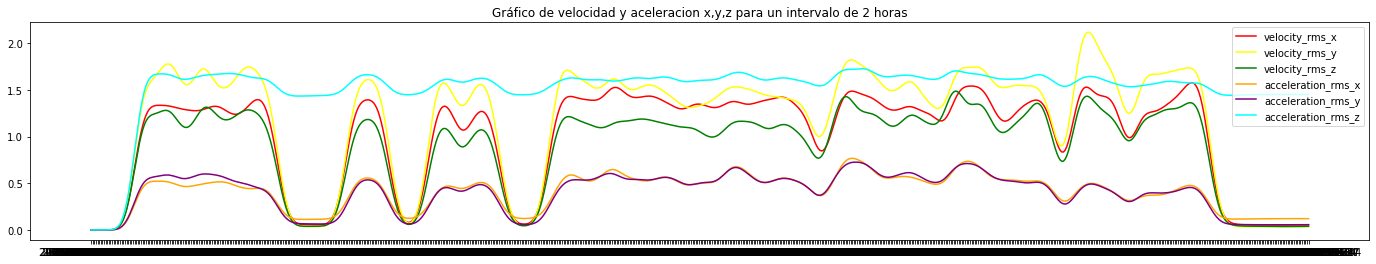

In [18]:
#Maquina 12
time4=df4['datetime']
columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z']
subset1_12,subset2_12,subset3_12=mov_avg_function(df4,columns, windows=windows_size)
subset1_12=iterative_mov_avg_function(subset1_12, windows_size,iterations)
subset2_12=iterative_mov_avg_function(subset2_12, windows_size,iterations)
subset3_12=iterative_mov_avg_function(subset3_12, windows_size,iterations)
  
columns=['acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
subset11_12,subset22_12,subset33_12=mov_avg_function(df4,columns, windows=windows_size)
subset11_12=iterative_mov_avg_function(subset11_12, windows_size,iterations)
subset22_12=iterative_mov_avg_function(subset22_12, windows_size,iterations)
subset33_12=iterative_mov_avg_function(subset33_12, windows_size,iterations)


leg=['velocity_rms_x','velocity_rms_y','velocity_rms_z','acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']


vectors=[subset1_12,subset2_12,subset3_12,subset11_12,subset22_12,subset33_12]
colors=['red','yellow','green','orange','purple','cyan']
tittle="Gráfico de velocidad y aceleracion x,y,z para un intervalo de 2 horas"
grafico_global(time4,vectors,tittle,colors,leg=leg)

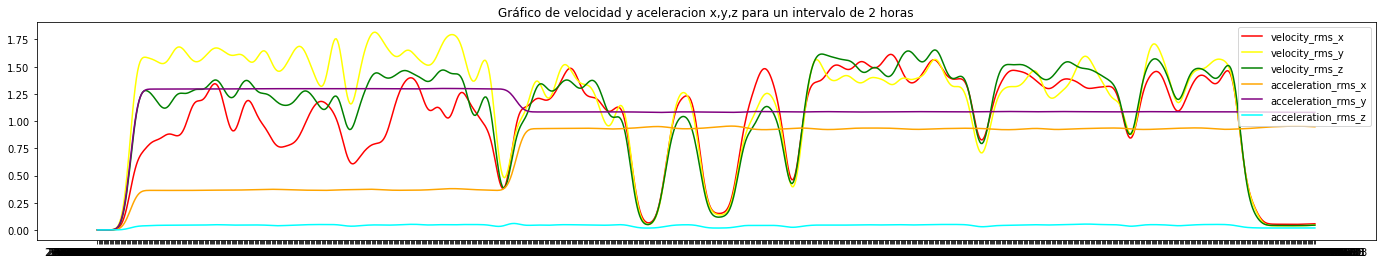

In [19]:
#Maquina 17
time5=df5['datetime']
columns=['velocity_rms_x','velocity_rms_y','velocity_rms_z']

subset1_17,subset2_17,subset3_17=mov_avg_function(df5,columns, windows=windows_size)
subset1_17=iterative_mov_avg_function(subset1_17, windows_size,iterations)
subset2_17=iterative_mov_avg_function(subset2_17, windows_size,iterations)
subset3_17=iterative_mov_avg_function(subset3_17, windows_size,iterations)
  
columns=['acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']
subset11_17,subset22_17,subset33_17=mov_avg_function(df5,columns, windows=windows_size)
subset11_17=iterative_mov_avg_function(subset11_17, windows_size,iterations)
subset22_17=iterative_mov_avg_function(subset22_17, windows_size,iterations)
subset33_17=iterative_mov_avg_function(subset33_17, windows_size,iterations)
leg=['velocity_rms_x','velocity_rms_y','velocity_rms_z','acceleration_rms_x','acceleration_rms_y','acceleration_rms_z']


vectors=[subset1_17,subset2_17,subset3_17,subset11_17,subset22_17,subset33_17]
colors=['red','yellow','green','orange','purple','cyan']
tittle="Gráfico de velocidad y aceleracion x,y,z para un intervalo de 2 horas"
grafico_global(time5,vectors,tittle,colors,leg=leg)

#8. Metodología<a name="ind8"></a>
La forma en que se determinará si la máquina está apagada o encendida, será observando los valores de velocidad y aceleración,siendo el caso en que estos coinciden en el mismo lugar de declive y se mantiene en su mínimo local. En caso de ser un mínimo, la máquina estaba apagada. En caso contrario, si el valor está por sobre su mínimo local, dicho de otra forma, este asciende entonces se considera que la máquina está encendida.Para poder utilizar toda la información provista lo que se hará será realizar una unión de todos los valores y se calculará la coincidencia de los mismos.



Obtenemos los valores para cada subconjunto y los unimos en un solo resultado.


In [20]:
def Union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

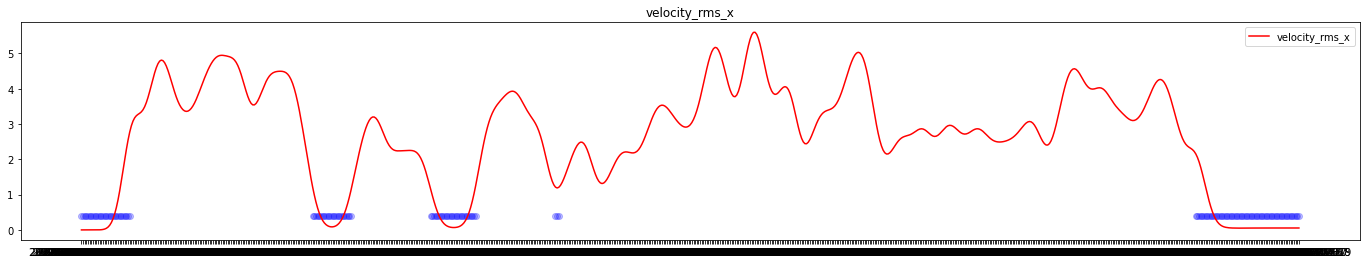

In [21]:
#Maquina 1
x_inds1_1,x_values1_1,line1_1=umbral_function(time,subset1_1,method="std1")
x_inds2_1,x_values2_1,line2_1=umbral_function(time,subset2_1,method="std1")
x_inds3_1,x_values3_1,line3_1=umbral_function(time,subset3_1,method="std1")
x_inds11_1,x_values11_1,line11_1=umbral_function(time,subset11_1,method="std1")
x_inds22_1,x_values22_1,line22_1=umbral_function(time,subset22_1,method="std1")
x_inds33_1,x_value33_1,line33_1=umbral_function(time,subset33_1,method="std1")

x_inds1_1_final=Union(x_inds1_1,Union(x_inds2_1,Union(x_inds3_1,Union(x_inds11_1,Union(x_inds22_1,x_inds33_1)))))


vectors=[subset1_1]

line1_1_final=min([line1_1,line2_1,line3_1,line11_1,line22_1,line33_1])
colors=['red']
tittle='velocity_rms_x'

grafico_global(time,vectors,tittle,colors,leg,umbral=True,umbral_vector=x_inds1_1_final,umbral_line=line1_1_final)

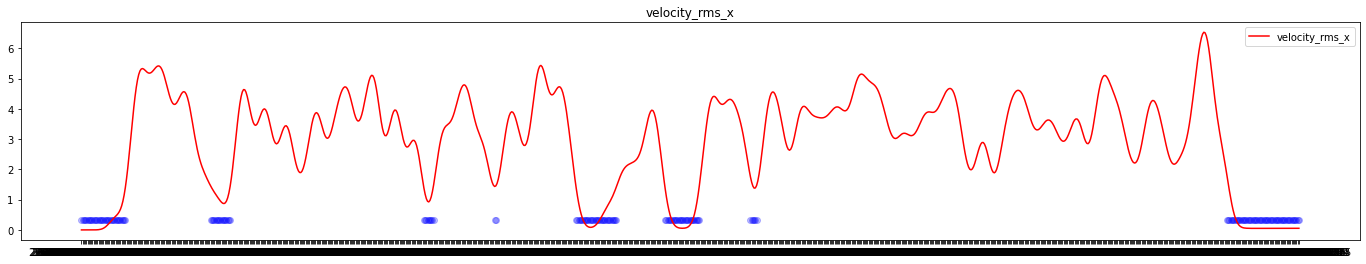

In [22]:
#Maquina 5
x_inds1_5,x_values1_5,line1_5=umbral_function(time2,subset1_5,method="std1")
x_inds2_5,x_values2_5,line2_5=umbral_function(time2,subset2_5,method="std1")
x_inds3_5,x_values3_5,line3_5=umbral_function(time2,subset3_5,method="std1")
x_inds11_5,x_values11_5,line11_5=umbral_function(time2,subset11_5,method="std1")
x_inds22_5,x_values22_5,line22_5=umbral_function(time2,subset22_5,method="std1")
x_inds33_5,x_value33_5,line33_5=umbral_function(time2,subset33_5,method="std1")

x_inds1_5_final=Union(x_inds1_5,Union(x_inds2_5,Union(x_inds3_5,Union(x_inds11_5,Union(x_inds22_5,x_inds33_5)))))


vectors=[subset1_5]

line1_5_final=min([line1_5,line2_5,line3_5,line11_5,line22_5,line33_5])
colors=['red']
tittle='velocity_rms_x'

grafico_global(time2,vectors,tittle,colors,leg,umbral=True,umbral_vector=x_inds1_5_final,umbral_line=line1_5_final)

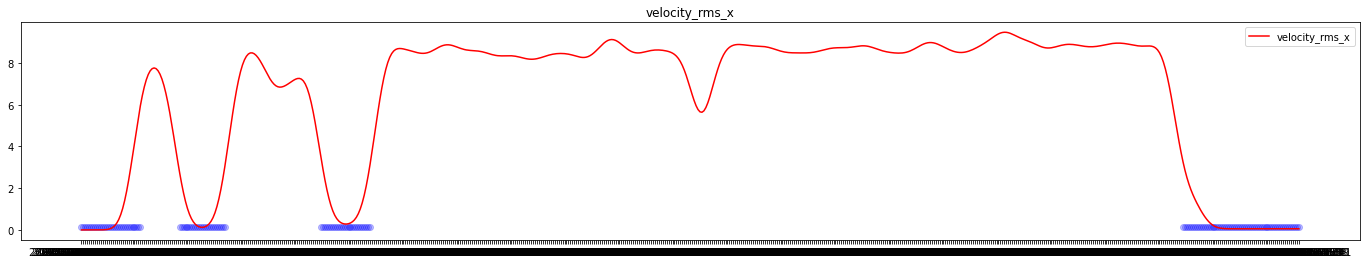

In [23]:
#Maquina 7
x_inds1_7,x_values1_7,line1_7=umbral_function(time3,subset1_7,method="std1")
x_inds2_7,x_values2_7,line2_7=umbral_function(time3,subset2_7,method="std1")
x_inds3_7,x_values3_7,line3_7=umbral_function(time3,subset3_7,method="std1")
x_inds11_7,x_values11_7,line11_7=umbral_function(time3,subset11_7,method="std1")
x_inds22_7,x_values22_7,line22_7=umbral_function(time3,subset22_7,method="std1")
x_inds33_7,x_value33_7,line33_7=umbral_function(time3,subset33_7,method="std1")

x_inds1_7_final=Union(x_inds1_7,Union(x_inds2_7,Union(x_inds3_7,Union(x_inds11_7,Union(x_inds22_7,x_inds33_7)))))


vectors=[subset1_7]

line1_7_final=min([line1_7,line2_7,line3_7,line11_7,line22_7,line33_7])
colors=['red']
tittle='velocity_rms_x'

grafico_global(time3,vectors,tittle,colors,leg,umbral=True,umbral_vector=x_inds1_7_final,umbral_line=line1_7_final)

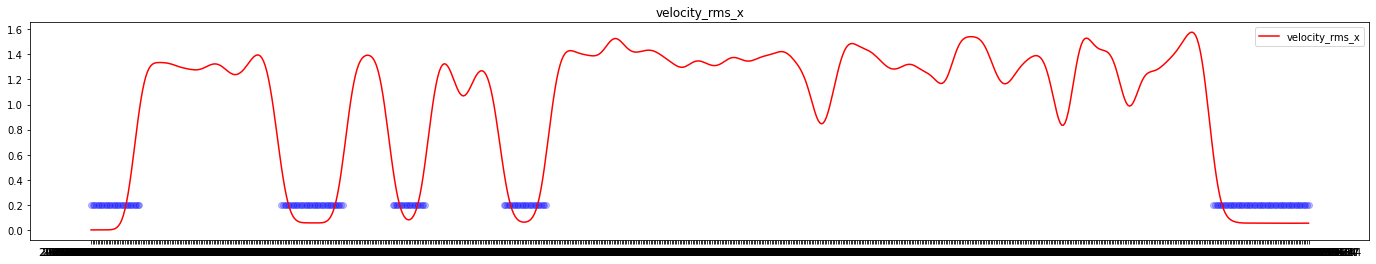

In [24]:
#Maquina 12
x_inds1_12,x_values1_12,line1_12=umbral_function(time4,subset1_12,method="std1")
x_inds2_12,x_values2_12,line2_12=umbral_function(time4,subset2_12,method="std1")
x_inds3_12,x_values3_12,line3_12=umbral_function(time4,subset3_12,method="std1")
x_inds11_12,x_values11_12,line11_12=umbral_function(time4,subset11_12,method="std1")
x_inds22_12,x_values22_12,line22_12=umbral_function(time4,subset22_12,method="std1")
x_inds33_12,x_value33_12,line33_12=umbral_function(time4,subset33_12,method="std1")

x_inds1_12_final=Union(x_inds1_12,Union(x_inds2_12,Union(x_inds3_12,Union(x_inds11_12,Union(x_inds22_12,x_inds33_12)))))


vectors=[subset1_12]

line1_12_final=min([line1_12,line2_12,line3_12,line11_12,line22_12,line33_12])
colors=['red']
tittle='velocity_rms_x'

grafico_global(time4,vectors,tittle,colors,leg,umbral=True,umbral_vector=x_inds1_12_final,umbral_line=line1_12_final)

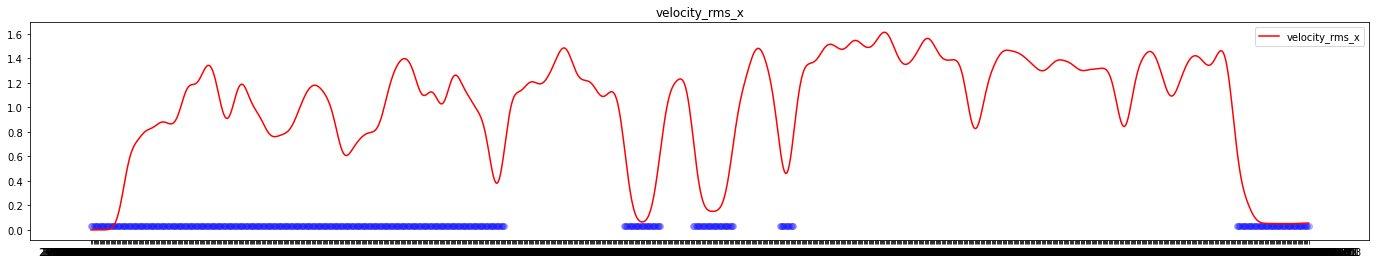

In [25]:
#Maquina 17
x_inds1_17,x_values1_17,line1_17=umbral_function(time5,subset1_17,method="std1")
x_inds2_17,x_values2_17,line2_17=umbral_function(time5,subset2_17,method="std1")
x_inds3_17,x_values3_17,line3_17=umbral_function(time5,subset3_17,method="std1")
x_inds11_17,x_values11_17,line11_17=umbral_function(time5,subset11_17,method="std1")
x_inds22_17,x_values22_17,line22_17=umbral_function(time5,subset22_17,method="std1")
x_inds33_17,x_value33_17,line33_17=umbral_function(time5,subset33_17,method="std1")

x_inds1_17_final=Union(x_inds1_17,Union(x_inds2_17,Union(x_inds3_17,Union(x_inds11_17,Union(x_inds22_17,x_inds33_17)))))


vectors=[subset1_17]

line1_17_final=min([line1_17,line2_17,line3_17,line11_17,line22_17,line33_17])
colors=['red']
tittle='velocity_rms_x'

grafico_global(time5,vectors,tittle,colors,leg,umbral=True,umbral_vector=x_inds1_17_final,umbral_line=line1_17_final)

#9. Análisis de resultados <a name="ind9"></a>
Como se puede observar las líneas azules representan los periodos en que la máquina está apagada, y el resto del tiempo se considera encendida.

Es importante mencionar que el método no es perfecto, debido que al aproximar los valores hay una pérdida de información, lo que induce a una reducción en la precisión de los resultados obtenidos.

Adicionalmente se tiene en duda el resultado de la última máquina, ya que a diferencia de las otras máquinas este tiene un comportamiento inicial erróneo, según se observa. Lo que se puede determinar es un error en la medición debido a algún fallo del sensor. Esto se concluye sin información adicional, por lo que puede existir una razón que se desconoce.


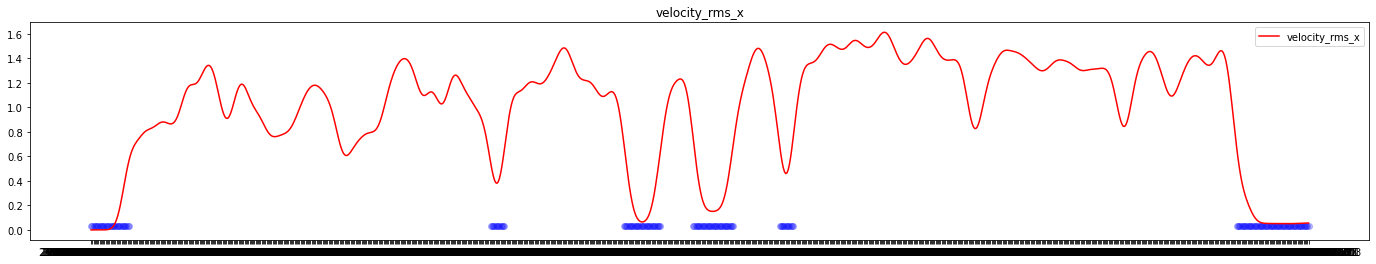

In [27]:
#Omitiendo los datos erroneo en la aceleracion, nos quedaria un resultado como el siguiente:
x_inds1_17,x_values1_17,line1_17=umbral_function(time5,subset1_17,method="std1")
x_inds2_17,x_values2_17,line2_17=umbral_function(time5,subset2_17,method="std1")
x_inds3_17,x_values3_17,line3_17=umbral_function(time5,subset3_17,method="std1")
x_inds11_17,x_values11_17,line11_17=umbral_function(time5,subset11_17,method="std1")
x_inds22_17,x_values22_17,line22_17=umbral_function(time5,subset22_17,method="std1")
x_inds33_17,x_value33_17,line33_17=umbral_function(time5,subset33_17,method="std1")

x_inds1_17_final=Union(x_inds1_17,Union(x_inds2_17,x_inds3_17))


vectors=[subset1_17]

line1_17_final=min([line1_17,line2_17,line3_17,line11_17,line22_17,line33_17])
colors=['red']
tittle='velocity_rms_x'

grafico_global(time5,vectors,tittle,colors,leg,umbral=True,umbral_vector=x_inds1_17_final,umbral_line=line1_17_final)

#10. Dataframe final obtenido <a name="ind10"></a>


In [40]:
import numpy as np
import os 
os.makedirs('resultados/machine_csv', exist_ok=True)

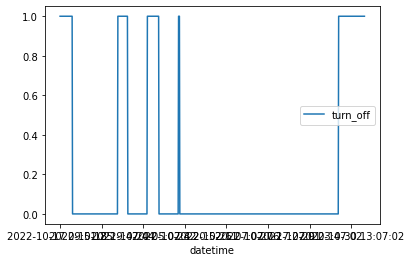

In [47]:
df11=df1
df11['turn_off']=df11['datetime'].isin(x_inds1_1_final)
df11.to_csv('resultados/machine_csv/machine_id_1_final.csv')
df11['turn_off']= df11['turn_off'].astype(int)
df11.plot(x='datetime',y='turn_off')

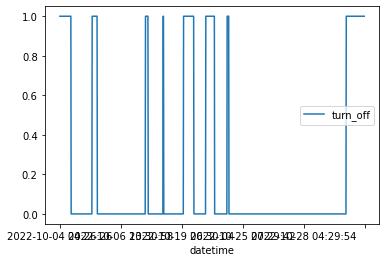

In [48]:
df22=df2
df22['turn_off']=df22['datetime'].isin(x_inds1_5_final)
df22.to_csv('resultados/machine_csv/machine_id_5_final.csv')
df22['turn_off']= df22['turn_off'].astype(int)
df22.plot(x='datetime',y='turn_off')

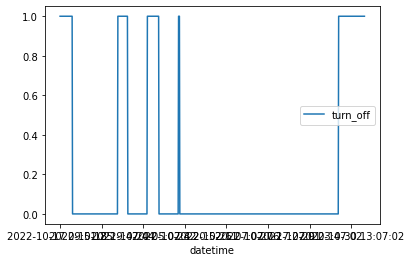

In [44]:
df33=df3
df33['turn_off']=df33['datetime'].isin(x_inds1_7_final)
df33.to_csv('resultados/machine_csv/machine_id_7_final.csv')
df33['turn_off']= df33['turn_off'].astype(int)
df11.plot(x='datetime',y='turn_off')

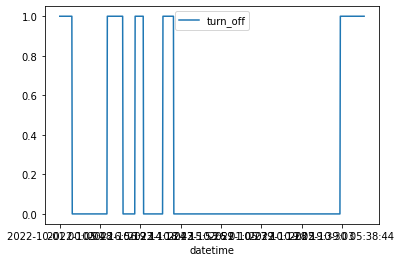

In [45]:
df44=df4
df44['turn_off']=df44['datetime'].isin(x_inds1_12_final)
df44.to_csv('resultados/machine_csv/machine_id_12_final.csv')
df44['turn_off']= df44['turn_off'].astype(int)
df44.plot(x='datetime',y='turn_off')

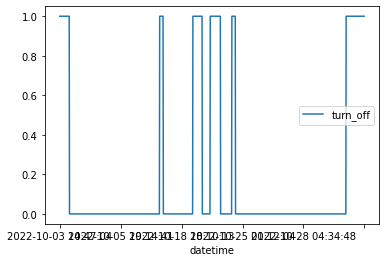

In [46]:
df55=df5
df55['turn_off']=df55['datetime'].isin(x_inds1_17_final)
df55.to_csv('resultados/machine_csv/machine_id_17_final.csv')
df55['turn_off']= df55['turn_off'].astype(int)
df55.plot(x='datetime',y='turn_off')

#11. Conclusiones <a name="ind11"></a>

Según lo obtenido se concluye un buen resultado para el problema, lo cual dependería los cuales presentan una fuerte dependencia de los HIPERPARAMETROS. Estos son el tamaño de la ventana y el umbral, que para este caso se calculó como el promedio global de los valores, menos su desviación. Estos son buenos indicadores para determinar el comportamiento de apagado y encendido de la máquina.

Otras posibles mejoras serían, una buscando otros métodos estadísticos o de machine learning, que sean capaces de capturar el comportamiento exacto de la máquina.Y otra posibilidad sería, el poder obtener más información de los datos recopilados como lo son el horario real de su ciclo , una vez registrados, comparar los resultados ya obtenidos anteriormente.
